In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


Reading the data

Creating Independent and Dependent Variables

In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/Desharnais.csv")
dataset.head()

max_corr_features =  [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']


x=np.array(dataset[max_corr_features])

y=np.array(dataset['Effort'])

Scaling the data

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)
y=np.reshape(y,(81,1))
y=scaler.fit_transform(y)

 Splitting the dataset into training and testing set (80/20)

In [4]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state =67)

In [5]:
x_train

array([[1.        , 1.        , 0.66666667, 0.31578947, 0.06841505,
        0.17631579, 0.06641366, 0.19148936, 0.0483871 ],
       [1.        , 0.25      , 0.5       , 0.34210526, 0.08779932,
        0.58684211, 0.23055028, 0.59574468, 0.23529412],
       [1.        , 0.5       , 0.66666667, 0.13157895, 0.07981756,
        0.31842105, 0.12713472, 0.46808511, 0.12144213],
       [0.4       , 0.25      , 0.66666667, 0.10526316, 0.07867731,
        0.24210526, 0.09867173, 0.19148936, 0.0740038 ],
       [0.4       , 0.625     , 0.66666667, 0.18421053, 0.09122007,
        0.50789474, 0.20493359, 0.59574468, 0.20967742],
       [1.        , 0.625     , 0.5       , 0.21052632, 0.24401368,
        0.3       , 0.25711575, 0.4893617 , 0.24478178],
       [0.6       , 0.25      , 0.5       , 0.21052632, 0.12542759,
        0.09210526, 0.08349146, 0.42553191, 0.07874763],
       [0.2       , 0.125     , 0.66666667, 0.07894737, 0.21436716,
        0.30789474, 0.23529412, 0.59574468, 0.24003795],


 LGB Model

In [6]:

import lightgbm as lgb

model = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train)

c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(learning_rate=0.09, max_depth=-5, random_state=42)

Predicting the Close Price

In [7]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

In [8]:
y_pred=np.reshape(y_pred,(17,1))
y_test=np.reshape(y_test,(17,1))

Finding the RMSE and MAPE

Definition of Mean Absolute Percentage Error

In [9]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [10]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [12]:

# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.014475215312711856

RMSE:
 0.1203129889609258

MAPE:
 99.18990026160205

SMAPE:
 50.85

 Adj R2 score:
 0.4095263395743347


In [13]:

y_pred=scaler.inverse_transform(y_pred)

In [14]:


y_test=scaler.inverse_transform(y_test)

In [15]:

y_test=np.reshape(y_test,(17,))
y_pred=np.reshape(y_pred,(17,))

In [16]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted Effort':y_pred})
print(dfr)

    Actual Effort  Predicted Effort
0          5152.0       5855.208107
1         14973.0       9548.306346
2          5180.0       6669.696938
3         11361.0       9548.306346
4          2149.0       2081.833341
5          4067.0       4645.355632
6          9051.0       6349.786948
7          3948.0       9751.426672
8           847.0       2552.212044
9          2723.0       1447.745447
10         3437.0       7544.580789
11          805.0       1988.933569
12         1617.0       1716.415748
13        13860.0       9548.306346
14         6699.0       6189.141620
15         4620.0       6078.142530
16         7854.0       4094.092872


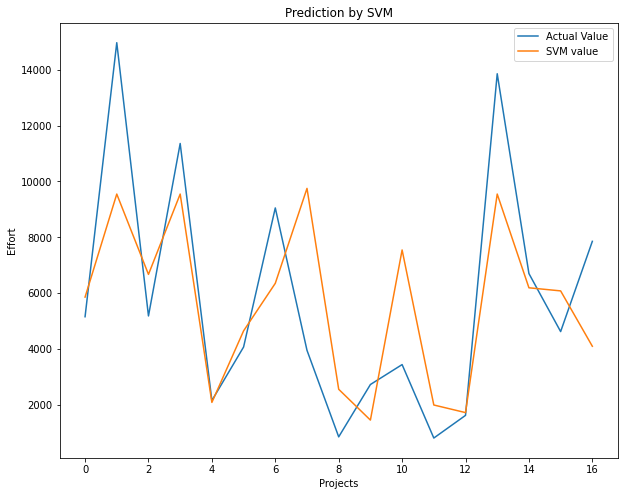

In [17]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="SVM value")
plt.title("Prediction by SVM")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()